# Notebook I: Value function iteration

In this jupyter notebook we apply the value function iteration method to some examples.

We start with the cake eating example (see Example 0.1 and Section 3.2). For this example the exact value function is known. Thus we can compare the approximated value function with the exact one.

## 1. Cake eating

Recall that the value function in the cake eating example is given by

\begin{align}
V(x) = (1- \alpha^{\frac{1}{\gamma}} ) ^{-\gamma} \frac{x^{1-\gamma}}{1-\gamma}
\end{align}

(see Section 3.2). The following Python code introduces the function into our notebook:

In [ ]:
def U(x):
    return x**(1-gamma)/(1-gamma)

def value_fct_cake_eating(x):
    return (1-alpha**(1/gamma))**(-gamma)*U(x)

We now plot the value function for the parameters $\alpha = 0.9$ and $\gamma = \frac12$.

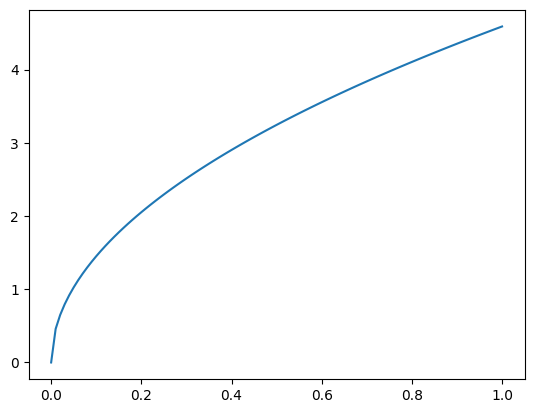

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


gamma=0.5
alpha=0.9

x = np.linspace(0,1,101)

plt.plot(x,value_fct_cake_eating(x))
#plt.ylabel('U(x)')
plt.show()


### Value function iteration

In order to apply the value function iteration method to the cake eating example, we need to discretize the problem. To this end we partition the cake with initial size $\bar x$ into $n$ pieces with equal size $\Delta = \frac{\bar x}{n}$. We set $x_i = i * \Delta$ for all $i \in \{0,1, \ldots, n\}$. The state space of the discretized problem is $\{x_0, x_1, \ldots, x_n\}$. We also need to discretize the action space. We set $A(x_i) = \{j*\Delta: 0 \le j \le i\}$.

After the discretization the value function can be represented as a vector of length $n+1$. The corresponding Bellman operator $T$ (see operator $T$ defined in Equation (17) of the script) acts on $\mathbb{R}^{n+1}$ and maps a vector $v = (v_0, \ldots, v_n)$ onto the vector $Tv$ given by

\begin{align*}
(Tv)(i) = \max_{0 \le j \le i} \{U(j \Delta) + \alpha * v(i-j)\}
\end{align*}

for $i \in \{0,1, \ldots, n\}$.

The code for the discretized Bellman operator is as follows:  

In [ ]:
def bellman_op(v):
    n = np.size(v)
    v_new = np.zeros(n)
    for i in range(1,n):
        for j in range(i+1):
          v_new[i] = max(v_new[i], U(j*Delta)+alpha*v[i-j])
    return v_new

By applying the function `bellman_op` consecutively to some initial vector in $\mathbb{R}^{n+1}$ we obtain a sequence converging to the value function of the discretized problem (see Proposition 3.13). In the following code we apply the operator 10 times to the zero vector.

In [ ]:
xbar = 1
n = 100
Delta = xbar/n

niter = 10

val_fct = np.zeros(n+1)

for t in range(niter):
    val_fct = bellman_op(val_fct)

We now compare the vector obtained after 10 steps with the value function of the original problem.

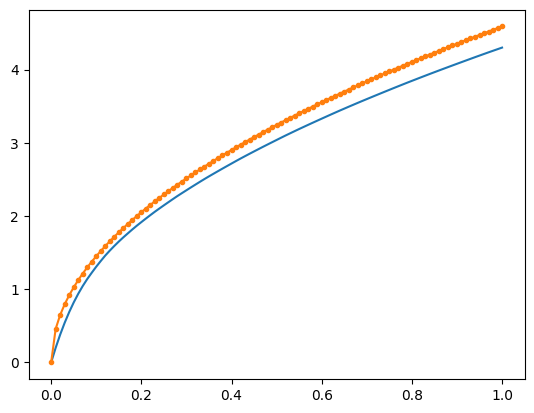

In [ ]:
plt.plot(x,val_fct,x,value_fct_cake_eating(x),'.-')
#plt.ylabel('U(x)')
plt.show()

The difference of the exact value for $\bar x = 1$ and the approximated one is given by

In [ ]:
abs(val_fct[n]-value_fct_cake_eating(1))

0.28850621388300013

**Exercise 1.**

a) Apply the function `bellman_op` 100 times to the zero vector and compare again the approximate value function of the discretized problem with the true value function of the original problem.

b) Discretize with $n = 200$ and apply the $100$ iterations of the Bellman operator. Compare again the approximate value function with the true value function of the original problem.

In [ ]:
xbar = 1
n = 100
Delta = xbar/n

niter = 100

val_fct = np.zeros(n+1)

for t in range(niter):
    val_fct = bellman_op(val_fct)

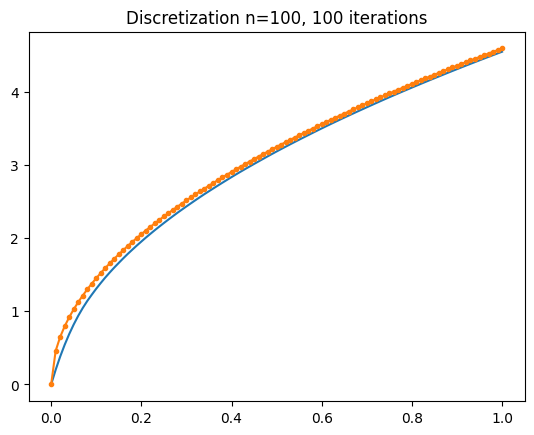

In [ ]:
plt.plot(x,val_fct,x,value_fct_cake_eating(x),'.-')
#plt.ylabel('U(x)')
plt.title('Discretization n=100, 100 iterations')
plt.show()

In [ ]:
print(abs(val_fct[n]-value_fct_cake_eating(1)))

0.04443966635609886


We conclude that a higher number of iterations improves the error in the value function.

In [ ]:
xbar = 1
n = 200
Delta = xbar/n

niter = 100

val_fct_b = np.zeros(n+1)

for t in range(niter):
    val_fct_b = bellman_op(val_fct_b)

In [ ]:
# discretize cake space with n=200
x_b = np.linspace(0,1,201)

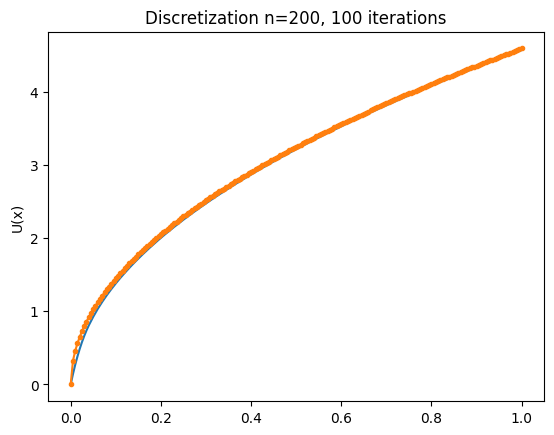

In [ ]:

plt.plot(x_b,val_fct_b,x_b,value_fct_cake_eating(x_b),'.-')
plt.ylabel('U(x)')
plt.title('Discretization n=200, 100 iterations')
plt.show()

In [ ]:
print(abs(val_fct_b[n]-value_fct_cake_eating(1)))

0.02220513325067852


As we increase the discretization of the state space, the accuracy of our approximation improves. We observe that by doubling the number of points from 100 to 200, the error in our approximation is halved, reducing from 0.044 to 0.022. This improvement occurs because increasing discretization allows the algorithm to capture finer variations in the value function. By dividing the state space into more intervals, we obtain a more detailed representation of the system's dynamics and rewards. However, it's crucial to strike a balance and avoid overfitting by limiting the extent to which we increase discretization. Overfitting may occur if we excessively partition the state space, capturing noise rather than meaningful patterns. Thus, while increasing discretization enhances accuracy, we must exercise caution to maintain a balance between precision and generalization in our approximation.

## 2. Risk taking

We now consider Example 0.2, Variant 2.  

In order to apply the value function iteration algorithm, we first modify the problem such that the state space becomes finite. Observe that for values $i$ far above zero, e.g. $i \ge 100$, we have $V(i) \approx \frac{1}{1-\alpha}$. Moreover, for values $i$ far below zero, e.g. $i \le -100$ we have $V(i) \approx 0$.

To simplify the problem we therefore assume that state $100$ is the maximal state and state $-100$ is the minimal state. Moreover, we assume that $100$ and $-100$ are absorbing states (i.e. states that can not be left once they have been attained). We also assume that $99$ is absorbing so that by choosing action $2$ in state $99$ we can not jump to $101$. Similarly, we assume that $-99$ is absorbing.

To sum up, the transition probabilities for arbitrary policies $\pi$ are given by
\begin{align*}
P(\pi)_{ij} = \left\{
\begin{array}{cc}
1 & \text{ if } i=j \text{ and } i,j \in \{-100, -99, 99, 100\}, \\
\frac12 & \text{ if } |i-j| = 1 \text{ and } \pi(i)=1 \text{ and } |i| \le 98, \\
\frac12 & \text{ if } |i-j| = 2 \text{ and } \pi(i)=2 \text{ and } |i| \le 98.
\end{array}\right.
\end{align*}
There is no need to change the action space $A = \{1, 2\}$.

A value function in the finite-state version of the problem is now a vector of length $201$. The Bellman operator $T$ acts on $\mathbb{R}^{201}$ and maps a vector $v = (v_{-100}, \ldots, v_{100})$ onto the vector $Tv$ with entries for $i \in \{-98,-97, \ldots, 97,98\}$ given by

\begin{align*}
(Tv)(i) = 1_{[0, \infty)}(i) +αmax\left\{\frac12(V(i+1)+V(i-1)), \frac12(V(i+2)+V(i-2))\right\}
\end{align*}

and with entries for the remaining states given by $(Tv)(-100) = (Tv)(-99) = 0$, and $(Tv)(99) = (Tv)(100) = 1/(1-\alpha)$.

**Exercise 2.**

a) Implement the Bellman operator as a python function.   

b) Use the value function iteration method for approximating the value function for $\alpha = 0.99$. Start with the zero vector and make 1000 iterations. What is the approximate value for $V(0)$? Generate a plot of the value function.

c) Extend your code such that it also provides an (approximate) optimal policy for the states $-98, -97, \ldots, 97, 98$. Plot the optimal policy and explain what you observe.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def bellman_operator(v, alpha):
    n = np.size(v)
    v_new = np.zeros(n)

    for i in range(2,199):
        v_new[i] = (1 if i >= 100 else 0) + alpha*max(0.5 * (v[i + 1] + v[i - 1]), 0.5 * (v[i + 2] + v[i - 2]))

    v_new[0] = v_new[1] = 0
    v_new[199] = v_new[200] = 1 / (1 - alpha)

    return v_new

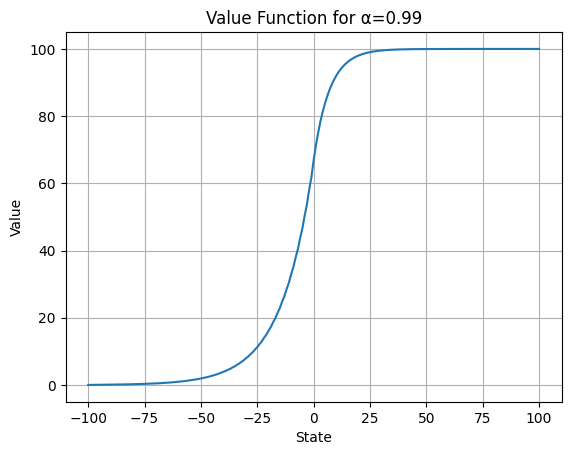

Approximate value for V(0): 0.0


In [ ]:
# Parameters
alpha = 0.99
num_iterations = 1000

v = np.zeros(201)
for _ in range(num_iterations):
  v = bellman_operator(v, alpha)


# Approximate value for V(0)
v0_approx = v[0]

# Plot the value function
states = np.arange(-100, 101)
plt.plot(states, v)
plt.title('Value Function for α=0.99')
plt.xlabel('State')
plt.ylabel('Value')
plt.grid(True)
plt.show()

print(f"Approximate value for V(0): {v0_approx}")



In [ ]:
#parameters

alpha = 0.99
iterations = 1000

v = np.zeros(201)

# approximating the value function
for _ in range(num_iterations):
  v = bellman_operator(v, alpha)



# Computing the optimal policy
def Optimal_policy(v):
    policy = np.zeros_like(v)
    for i in range(2, 199):
        policy[i] = 1 if v[i + 1] + v[i - 1] >= v[i + 2] + v[i - 2] else 2
    return policy

policy = Optimal_policy(v)

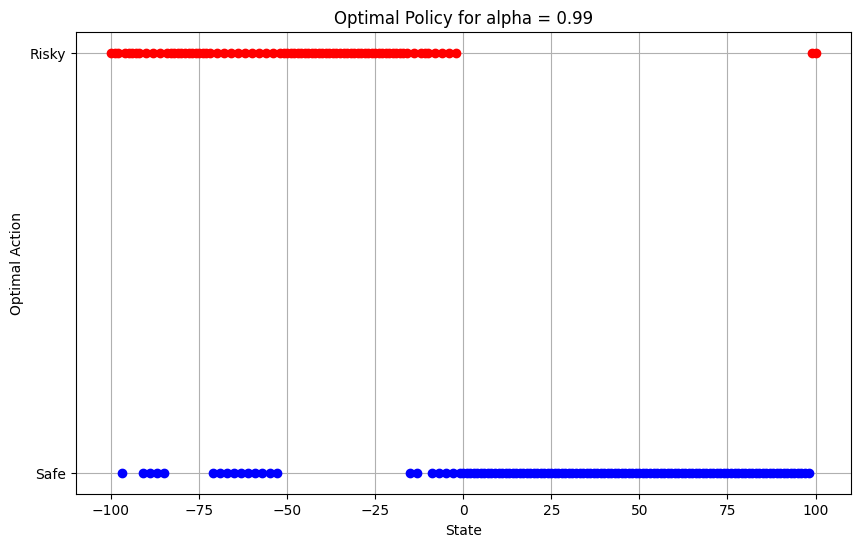

In [ ]:
states = np.arange(-100, 101)
actions = np.array(['safe', 'risky'])
plt.figure(figsize=(10, 6))
for i in range(len(states)):
    if policy[i] == 1:
        plt.plot(states[i], 1, 'bo')  # Plot safe action in blue
    else:
        plt.plot(states[i], 2, 'ro')  # Plot risky action in red

plt.title('Optimal Policy for alpha = 0.99')
plt.xlabel('State')
plt.ylabel('Optimal Action')
plt.yticks([1, 2], ['Safe', 'Risky'])
plt.grid(True)

plt.show()


The preceding plot illustrates the optimal policy, depicting the preferred action of the agent for each state. In negative states, the agent tends to favor the risky action, indicated by the red dots positioned at the top of the plot. This inclination towards risk-taking in negative states suggests a strategy to move away from undesirable states, seeking to escape from the negative zone. Conversely, in positive states, the agent opts for safe actions, denoted by the blue dots located at the bottom of the plot. This preference for safe actions in positive states reflects the agent's strategy to maintain or enhance its position within the positive zone, aiming to maximize cumulative rewards. Thus, the optimal policy demonstrates a dynamic decision-making approach that balances risk aversion and reward-seeking behavior across different states.